In [1]:
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("white")

In [2]:
df = pd.read_pickle('assets/Oslo.pkl')

X = df['latitude'].values
XX = np.linspace(X.min(), X.max(), 100)    
gap = (X.max()-X.min())/20    

Y = df['sqmPrice'].values

## Kernel Density Estimation

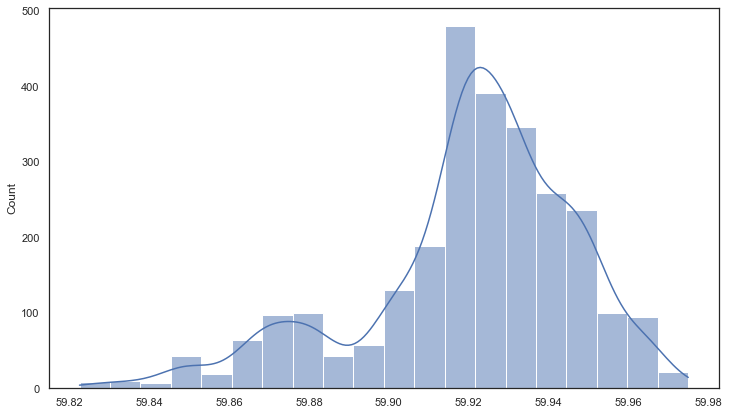

In [3]:
sns.histplot(X, bins=20, kde=True);

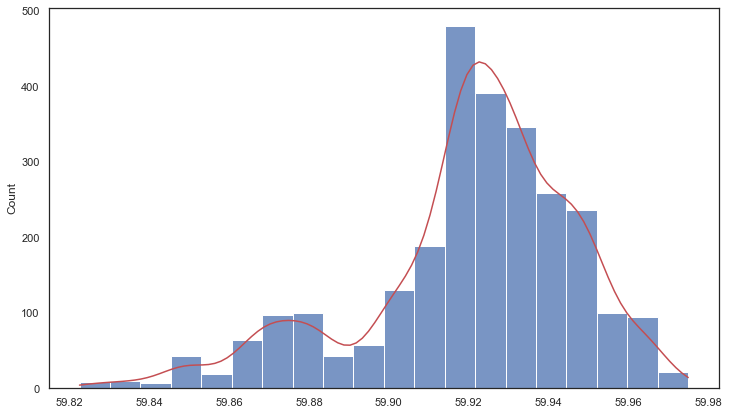

In [4]:
def kernel(x):
    return math.exp(-x**2/gap**2)    

def total_sum(x):
    return sum(map(lambda r: kernel(r), X-x))

bins = 20
totals = np.array(list(map(total_sum, XX)))
sum_ = sum(totals)
YY = 100*len(X)*totals/(sum_*bins)

ax = sns.histplot(X, bins=20)
plt.plot(XX, YY, 'r');

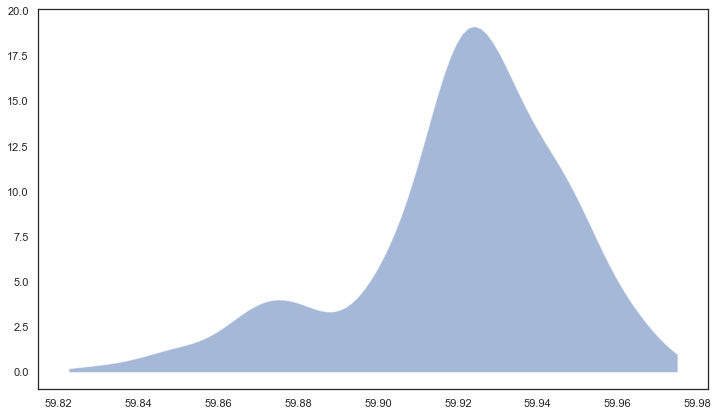

In [5]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=gap).fit(X[:, None])
logprob = kde.score_samples(XX[:, None])

plt.fill_between(XX, np.exp(logprob), alpha=0.5);

## Kernel Regression

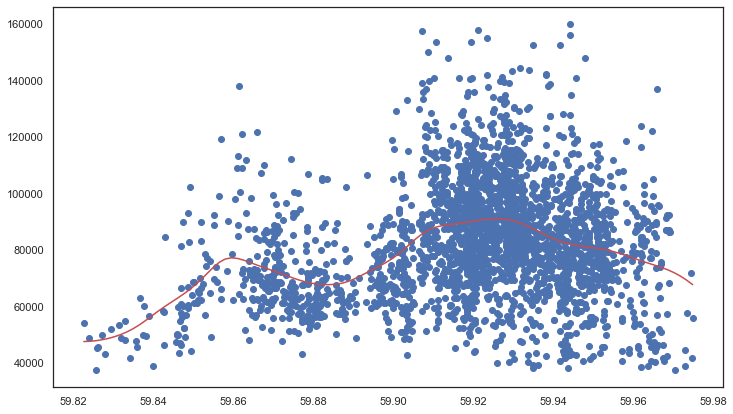

In [6]:
def kernel(x):
    return math.exp(-x**2/gap**2)

def total_sum(x):
    return sum(map(lambda r: kernel(r), X-x))

def weighted_sum(x):
    return sum(np.apply_along_axis(lambda r: r[0]*kernel(r[1]), 1, np.column_stack((Y, X-x))))

totals = np.array(list(map(total_sum, XX)))
weighted = np.array(list(map(weighted_sum, XX)))
YY = weighted/totals

ok = [i for i,total in enumerate(totals) if total > 5]
rg = range(min(ok), max(ok)+1)

plt.plot(XX[rg], YY[rg], 'r')
plt.scatter(X, Y);

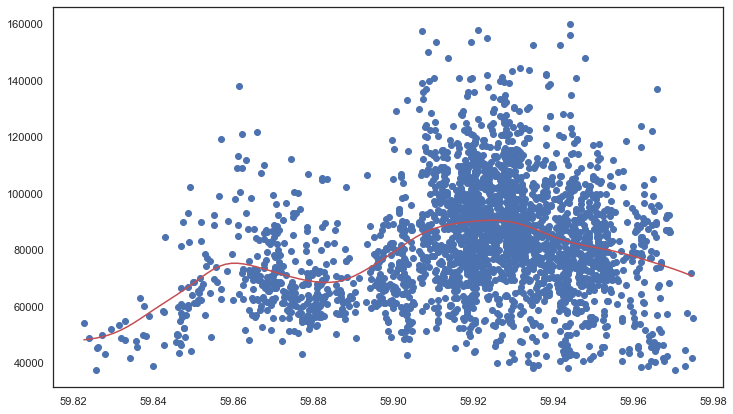

In [7]:
from sklearn.metrics.pairwise import pairwise_kernels

K = pairwise_kernels(X[:,None], XX[:,None], metric='rbf', gamma=10000)
YY = (K * Y[:,None]).sum(axis=0) / K.sum(axis=0)

plt.plot(XX, YY, 'r')
plt.scatter(X, Y);

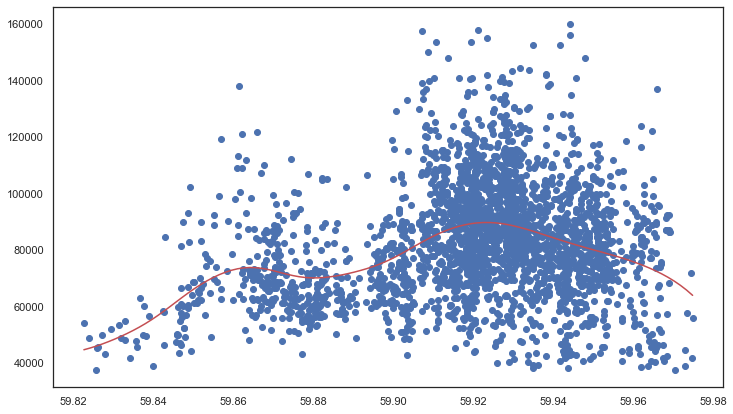

In [8]:
from statsmodels.nonparametric.kernel_regression import KernelReg

kr = KernelReg(Y, X, 'c', bw=[0.01])
YY = kr.fit(XX)[0]

plt.plot(XX, YY, 'r')
plt.scatter(X, Y);